### Training the SVR on the joint feature vectors

## Create feature vectors and train/test split 

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd

In [3]:
# Load Answers from relevant questions
complete_df = pd.read_csv('CleanedSummarizedTranscriptionsPredictionsAnswersRelevant.tsv', sep="\t")
complete_df

,patient_id,original_transcript,cleaned_transcript,summary,DeprobertaClassifier_Prediction,DeprobertaClassifier_Probabilities,Encoded_Answers
0,302,"Okay, there you go. So you can just move arou...","Okay, there you go. So you can just move aroun...",I feel down a lot because many things daily re...,moderate,[0.03613667 0.78836375 0.1754996 ],"[None, 1, 0, None, None, None, None]"
1,303,"Okay, there you are. Wow. You won't see yours...","Okay, there you are. Wow. You won't see yourse...",I haven't been diagnosed with depression. I tr...,moderate,[0.10407069 0.5940002 0.30192912],"[None, None, 0.5, None, 0.5, None, None]"
2,308,"Just takes a sec. Okay, perfect. So if we jus...","Just takes a sec. Okay, perfect. So if we just...","I've felt depressed for a long time, even befo...",moderate,[0.34313062 0.6353692 0.02150021],"[0, 1, 1, 1, 1, None, None]"
3,309,So we're just going to move around and make s...,Here is the cleaned transcript:\n\nSo we're ju...,I'm not doing very good lately. My mood can be...,not depression,[0.5857704 0.3882412 0.02598836],"[0, 1, 1, 0.5, None, 0.5, 0.5]"
4,314,There you are. Don't I look gorgeous? Let me ...,Here is the cleaned transcript:\n\nThere you a...,"I've been diagnosed with depression, though it...",not depression,[0.91874385 0.06404865 0.01720752],"[1, None, 0.5, 0, 0.5, None, None]"
...,...,...,...,...,...,...,...
120,673,Okay. Now I'm going to bring her over to a hu...,Okay. So I'm going to get her started up and t...,"I'm feeling pretty depressed, kind of down, th...",moderate,[0.01176697 0.73872477 0.24950835],"[0, 1, None, None, None, None, None]"
121,677,"Okay, I'm going to bring up our Virgin Human....","Okay, I'm doing fine. I was born in. I've been...",Losing my wife three years ago today was reall...,moderate,[0.0847379 0.68700236 0.22825977],"[0.5, 0, 1, 0, None, None, 0.5]"
122,680,"Okay, okay. Thank you. Yep. There she is. Whe...","Okay. Thank you.\nHi, I'm Ellie. Nice for comi...","Lately, I've been feeling depressed, with mood...",not depression,[0.90887064 0.07844017 0.01268909],"[0, 1, 1, 0.5, None, None, 0.5]"
123,684,go ahead and press this button. Some people t...,go ahead and press this button. Some people th...,"Lately, I've been feeling up and down, today's...",not depression,[0.81714106 0.14357266 0.03928635],"[0, 1, 1, None, 1, None, 0.5]"


In [4]:
import ast
import numpy as np

def parse_array_string(s):
    # Parse numpy array string format
    numbers = s.strip('[]').split()
    return [float(x) for x in numbers]

def parse_list_string(s):
    # Parse list string format
    return ast.literal_eval(s)

complete_df['FullFeatureVector'] = complete_df.apply(
    lambda row: parse_array_string(row['DeprobertaClassifier_Probabilities']) + parse_list_string(row['Encoded_Answers']), 
    axis=1
)
complete_df.drop(columns=['DeprobertaClassifier_Probabilities', 'Encoded_Answers'], inplace=True)
complete_df



,patient_id,original_transcript,cleaned_transcript,summary,DeprobertaClassifier_Prediction,FullFeatureVector
0,302,"Okay, there you go. So you can just move arou...","Okay, there you go. So you can just move aroun...",I feel down a lot because many things daily re...,moderate,"[0.03613667, 0.78836375, 0.1754996, None, 1, 0..."
1,303,"Okay, there you are. Wow. You won't see yours...","Okay, there you are. Wow. You won't see yourse...",I haven't been diagnosed with depression. I tr...,moderate,"[0.10407069, 0.5940002, 0.30192912, None, None..."
2,308,"Just takes a sec. Okay, perfect. So if we jus...","Just takes a sec. Okay, perfect. So if we just...","I've felt depressed for a long time, even befo...",moderate,"[0.34313062, 0.6353692, 0.02150021, 0, 1, 1, 1..."
3,309,So we're just going to move around and make s...,Here is the cleaned transcript:\n\nSo we're ju...,I'm not doing very good lately. My mood can be...,not depression,"[0.5857704, 0.3882412, 0.02598836, 0, 1, 1, 0...."
4,314,There you are. Don't I look gorgeous? Let me ...,Here is the cleaned transcript:\n\nThere you a...,"I've been diagnosed with depression, though it...",not depression,"[0.91874385, 0.06404865, 0.01720752, 1, None, ..."
...,...,...,...,...,...,...
120,673,Okay. Now I'm going to bring her over to a hu...,Okay. So I'm going to get her started up and t...,"I'm feeling pretty depressed, kind of down, th...",moderate,"[0.01176697, 0.73872477, 0.24950835, 0, 1, Non..."
121,677,"Okay, I'm going to bring up our Virgin Human....","Okay, I'm doing fine. I was born in. I've been...",Losing my wife three years ago today was reall...,moderate,"[0.0847379, 0.68700236, 0.22825977, 0.5, 0, 1,..."
122,680,"Okay, okay. Thank you. Yep. There she is. Whe...","Okay. Thank you.\nHi, I'm Ellie. Nice for comi...","Lately, I've been feeling depressed, with mood...",not depression,"[0.90887064, 0.07844017, 0.01268909, 0, 1, 1, ..."
123,684,go ahead and press this button. Some people t...,go ahead and press this button. Some people th...,"Lately, I've been feeling up and down, today's...",not depression,"[0.81714106, 0.14357266, 0.03928635, 0, 1, 1, ..."


In [5]:
# Now, expand the 'FullFeatureVector' column into new columns
# First, extract the patient_id to keep it
patient_ids = complete_df[['patient_id']].copy()

# Apply pd.Series to the 'FullFeatureVector' column to create new columns
# This will automatically handle lists of varying lengths by filling shorter ones with NaN
feature_vectors_df = complete_df['FullFeatureVector'].apply(pd.Series)

# Rename the new feature columns. We use f'feature_{i+1}' for clarity.
# The number of columns will be determined by the longest vector in 'FullFeatureVector'.
num_features = feature_vectors_df.shape[1]
feature_vectors_df.columns = [f'feature_{i+1}' for i in range(num_features)]

# Concatenate the patient_id with the new feature columns to form the final DataFrame
final_df = pd.concat([patient_ids, feature_vectors_df], axis=1)

# Add real PHW scores
get_scores = pd.read_csv('CleanedSummarizedTranscripts_Scored.tsv', sep="\t")
final_df = final_df.merge(get_scores[['patient_id', 'PHQ_Score']], on='patient_id', how='left')

print("Final DataFrame with expanded feature columns:")
final_df

#save to csv
final_df.to_csv('ExpandedFeatureVectorsWithPHQScores.csv', index=False)


Final DataFrame with expanded feature columns:


In [6]:
train_ids = pd.read_csv('FilesForModel/train_ids.tsv', sep="\t")
eval_ids = pd.read_csv('FilesForModel/eval_ids.tsv', sep="\t")

# Split my final DataFrame into training and evaluation sets
train_df = final_df[final_df['patient_id'].isin(train_ids['patient_id'])]
eval_df = final_df[final_df['patient_id'].isin(eval_ids['patient_id'])]

# Separate features and target variable
X_train = train_df.drop(columns=['PHQ_Score', 'patient_id'])
y_train = train_df['PHQ_Score']  # Assuming 'patient_id' is the target variable for this example
X_test = eval_df.drop(columns=['PHQ_Score', 'patient_id'])
y_test = eval_df['PHQ_Score']  # Assuming 'patient_id' is the target variable for this example


# Train Model

In [7]:
# Impute missing valuesfrom sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [8]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Train the model
svr.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_imputed)

# Save preds for each id in new csv, sorted by patient_id
predictions_df = pd.DataFrame({
    'patient_id': eval_df['patient_id'],
    'predicted_phq_score': y_pred
}).sort_values('patient_id')
predictions_df.to_csv('FilesForModel/svr_predictions.tsv', sep='\t', index=False)


In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")


Test MSE: 17.45
Test RMSE: 4.18
Test R²: 0.44


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_imputed, y_train)
y_rf_pred = rf.predict(X_test_imputed)

print("RF R²:", r2_score(y_test, y_rf_pred))
print("RF MSE:", mean_squared_error(y_test, y_rf_pred))


RF R²: 0.4048147862720921
RF MSE: 18.535496000000002


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
param_grid = {
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.01, 0.1, 0.2, 0.5],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}
use_scaled: True

grid = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train_imputed, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test_imputed)

# Save predictions for each ID in new tsv, sorted by patient_id
y_pred_df = pd.DataFrame({
    'patient_id': eval_df['patient_id'].values,
    'predicted_value': y_pred
})
y_pred_df = y_pred_df.sort_values('patient_id')
y_pred_df.to_csv('textual_predictions.tsv', sep='\t', index=False)


print("Tuned SVR Test R²:", r2_score(y_test, y_pred))
print("Tuned SVR Test MSE:", mean_squared_error(y_test, y_pred))
print("Tuned SVR Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Tuned SVR Test MAE:", mean_absolute_error(y_test, y_pred))

# Now run th epredictions on the training set as well for comparison
# Predict on the training set
y_train_pred = grid.predict(X_train_imputed)
# Save predictions for each ID in new tsv, sorted by patient_id
train_pred_df = pd.DataFrame({
    'patient_id': train_df['patient_id'].values,
    'predicted_value': y_train_pred
})
train_pred_df = train_pred_df.sort_values('patient_id')
train_pred_df.to_csv('textual_train_predictions.tsv', sep='\t', index=False)

Best parameters: {'C': 100, 'epsilon': 0.01, 'gamma': 'auto'}
Best CV R²: 0.19463452211522708
Tuned SVR Test R²: 0.46595787304274505
Tuned SVR Test MSE: 16.631353534553618
Tuned SVR Test RMSE: 4.078155653546541
Tuned SVR Test MAE: 3.159790707848655


In [11]:
from sklearn.linear_model import LinearRegression

# Fit a linear model on predicted vs. true
bias_model = LinearRegression()
bias_model.fit(y_pred.reshape(-1, 1), y_test)

# Correct predictions
y_pred_corrected = bias_model.predict(y_pred.reshape(-1, 1))

# New evaluation
from sklearn.metrics import r2_score, mean_squared_error
print("Corrected R²:", r2_score(y_test, y_pred_corrected))
print("Corrected MSE:", mean_squared_error(y_test, y_pred_corrected))


Corrected R²: 0.517959443308492
Corrected MSE: 15.011899832709622


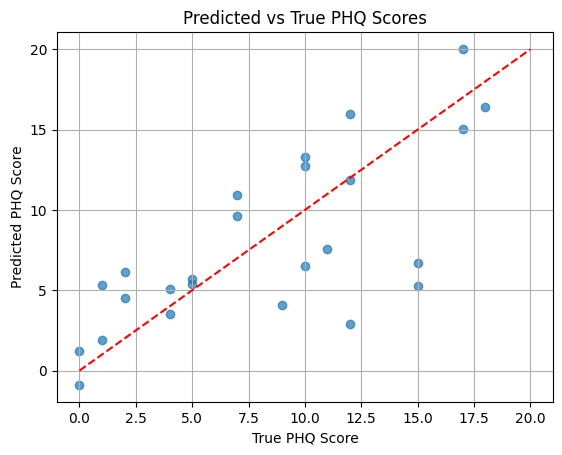

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.xlabel('True PHQ Score')
plt.ylabel('Predicted PHQ Score')
plt.title('Predicted vs True PHQ Scores')
plt.grid(True)
plt.show()


In [13]:
print("True mean:", np.mean(y_test))
print("Predicted mean:", np.mean(y_pred))


True mean: 8.24
Predicted mean: 7.8753627274438704


# ALL MODELS COMPARED

Training and evaluating models...

Training SVR_RBF...
Best params: {'C': 10, 'epsilon': 0.2, 'gamma': 0.01}
CV R² (mean ± std): 0.151 ± 0.538
Test R²: 0.486
Test RMSE: 4.002

Training SVR_Linear...
Best params: {'C': 10, 'epsilon': 0.5}
CV R² (mean ± std): 0.195 ± 0.417
Test R²: 0.481
Test RMSE: 4.020

Training SVR_Poly...
Best params: {'C': 1, 'degree': 3, 'epsilon': 0.5, 'gamma': 'auto'}
CV R² (mean ± std): -0.290 ± 1.028
Test R²: 0.369
Test RMSE: 4.433

Training Random_Forest...
Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
CV R² (mean ± std): 0.146 ± 0.482
Test R²: 0.437
Test RMSE: 4.187

Training Gradient_Boosting...
Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
CV R² (mean ± std): 0.065 ± 0.585
Test R²: 0.448
Test RMSE: 4.146

Training Ridge...
Best params: {'alpha': 10}
CV R² (mean ± std): 0.208 ± 0.388
Test R²: 0.471
Test RMSE: 4.059

Training Lasso...
Best params: {'alpha': 0.

/Users/joaomata/Desktop/LBMP/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joaomata/Desktop/LBMP/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joaomata/Desktop/LBMP/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/joaomata/Desktop/LBMP/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
 

Best params: {'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
CV R² (mean ± std): 0.009 ± 0.567
Test R²: 0.253
Test RMSE: 4.824

FINAL RESULTS SUMMARY
            Model  CV_R2_Mean  Test_R2  Test_RMSE  Test_MAE
          SVR_RBF    0.150992 0.485706   4.002044  3.196417
       SVR_Linear    0.195104 0.481167   4.019664  3.193525
            Ridge    0.207818 0.470841   4.059468  3.324934
       ElasticNet    0.207084 0.469636   4.064088  3.330283
            Lasso    0.203756 0.455002   4.119774  3.406824
Gradient_Boosting    0.064766 0.448154   4.145577  3.370000
    Random_Forest    0.145676 0.437005   4.187243  3.287869
         SVR_Poly   -0.290161 0.368963   4.433058  3.800516
              KNN    0.078109 0.261142   4.796853  3.582857
   Neural_Network    0.008630 0.252705   4.824165  3.884873
    Decision_Tree   -0.047236 0.146830   5.154586  3.816857


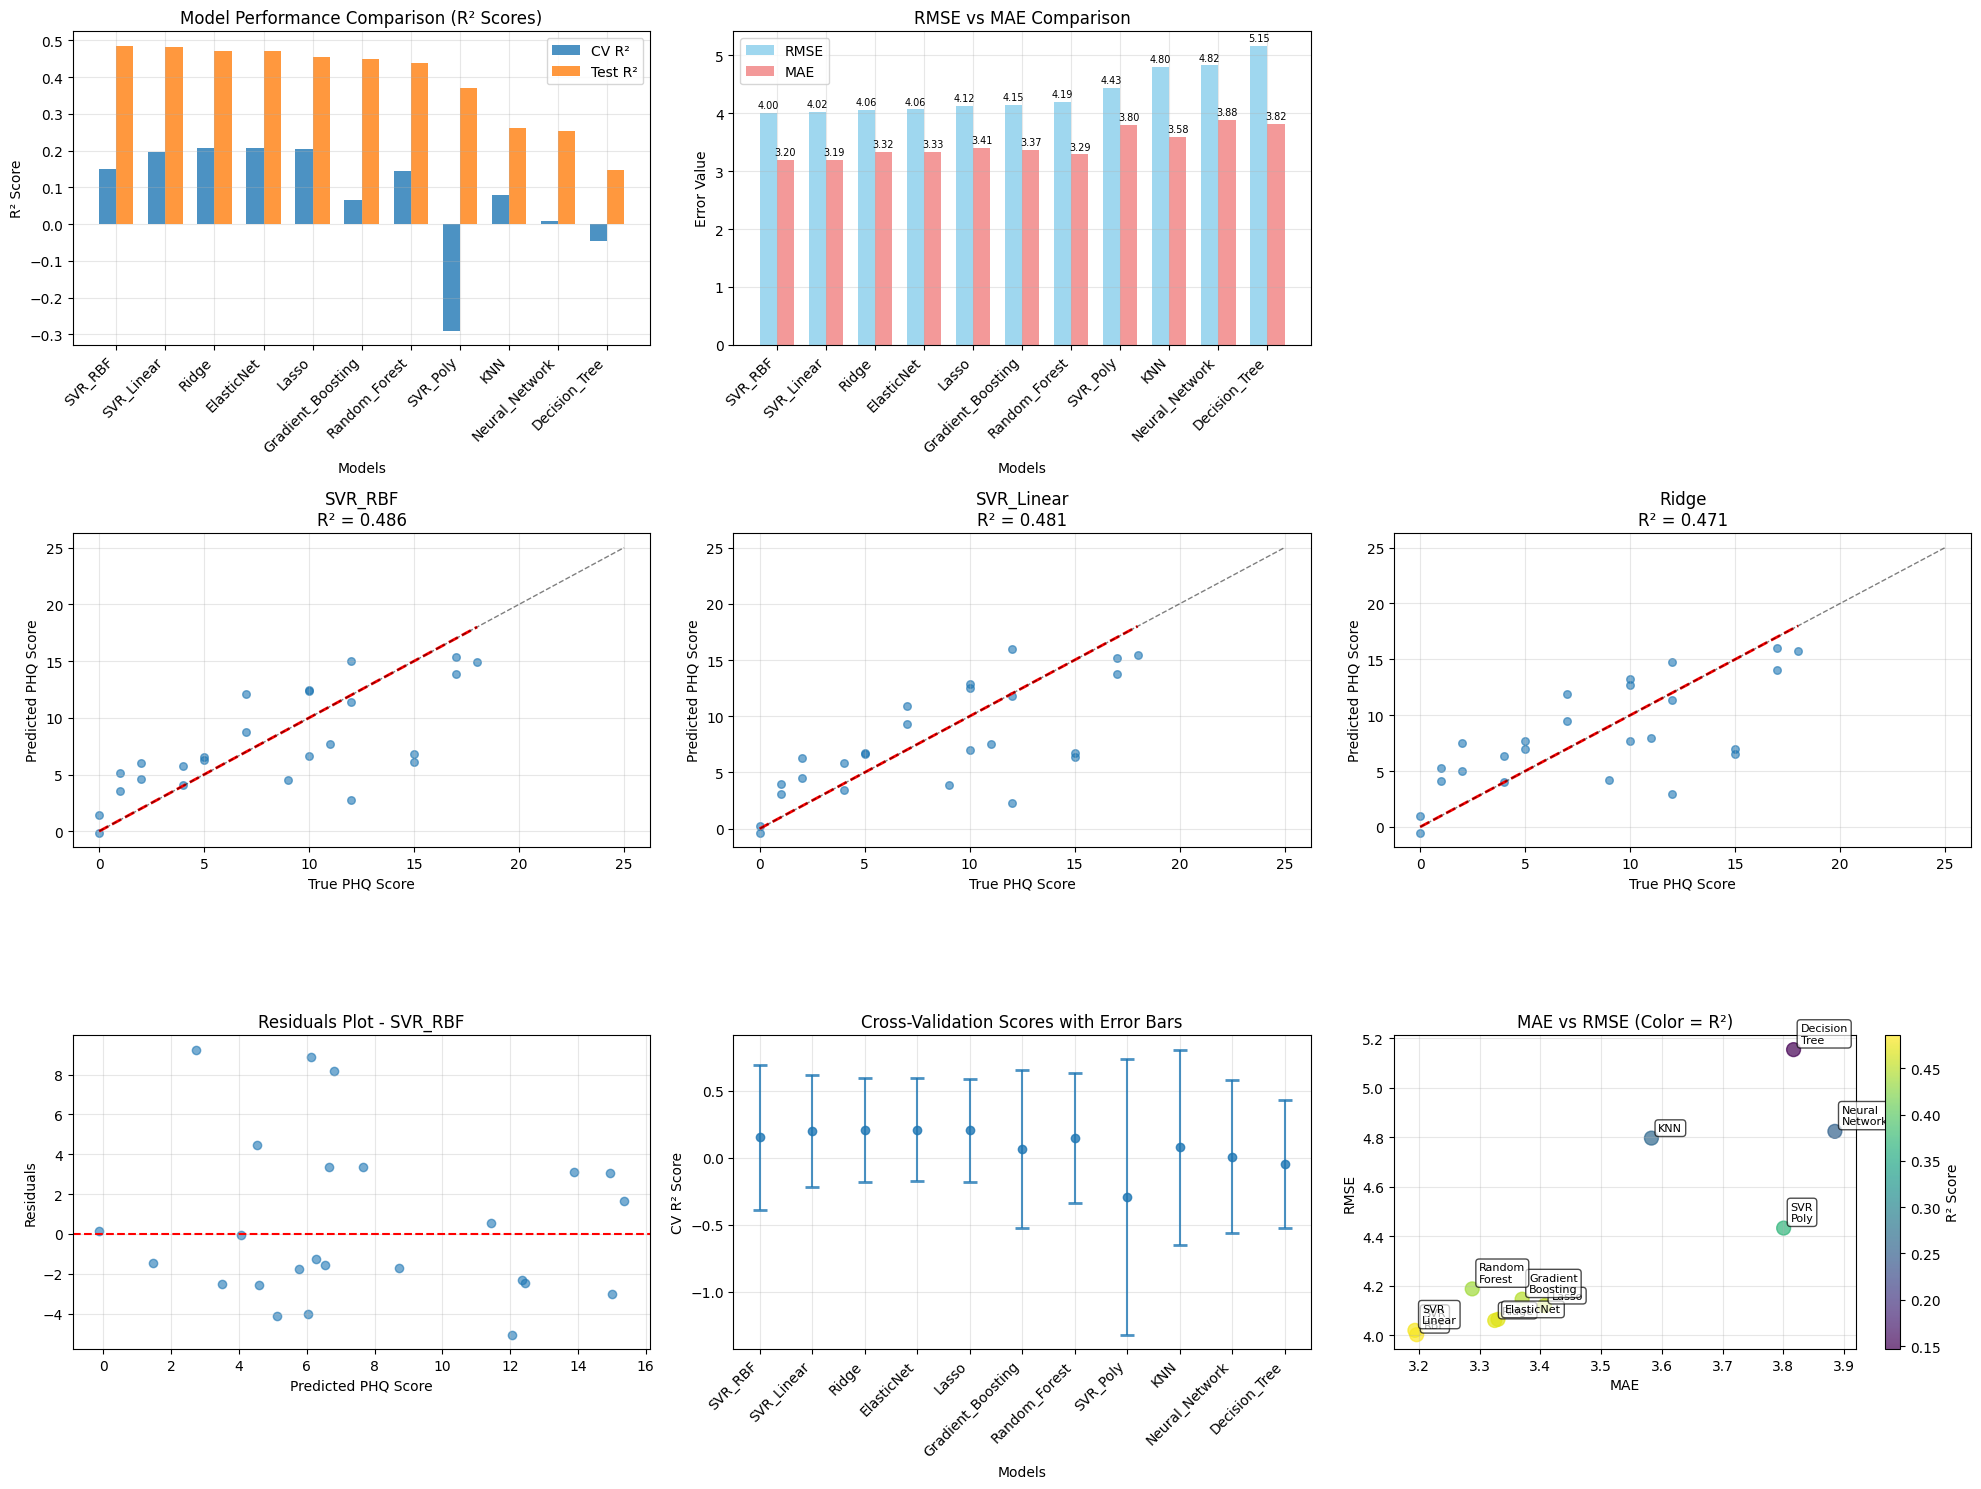


DETAILED ANALYSIS

🏆 BEST PERFORMING MODEL: SVR_RBF
   - Test R²: 0.486
   - Test RMSE: 4.002
   - Test MAE: 3.196
   - Best Parameters: {'C': 10, 'epsilon': 0.2, 'gamma': 0.01}

📊 PERFORMANCE INSIGHTS:
   - Range of R² scores: 0.147 to 0.486
   - Range of RMSE: 4.00 to 5.15
   - Range of MAE: 3.19 to 3.88

🎯 BEST BY SPECIFIC METRICS:
   - Best R²: SVR_RBF (0.486)
   - Best RMSE: SVR_RBF (4.002)
   - Best MAE: SVR_Linear (3.194)

🎯 BEST GENERALIZATION: KNN
   - Gap between CV and Test R²: -0.183

💡 RECOMMENDATIONS:
   ⚠️  Moderate performance with SVR_RBF. Consider feature engineering.

   📈 Top 3 models to consider:
      1. SVR_RBF (R² = 0.486, RMSE = 4.00, MAE = 3.20)
      2. SVR_Linear (R² = 0.481, RMSE = 4.02, MAE = 3.19)
      3. Ridge (R² = 0.471, RMSE = 4.06, MAE = 3.32)

💾 Results saved to 'model_comparison_results.csv'


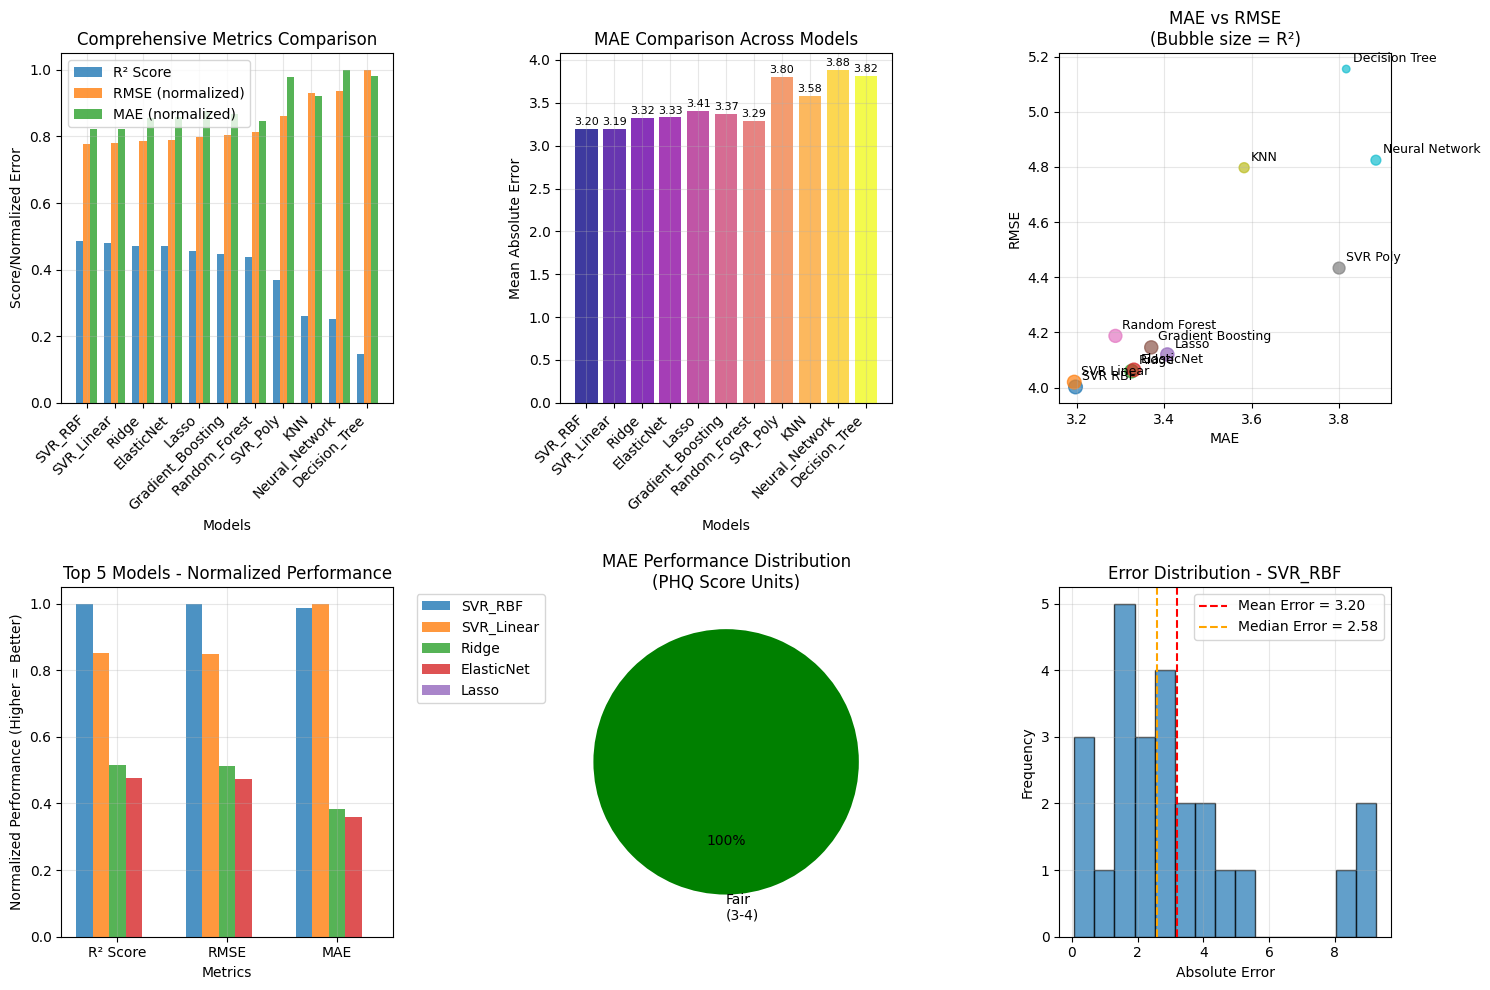


📏 MAE INTERPRETATION GUIDE:
   - MAE represents the average absolute difference between predicted and true PHQ scores
   - For PHQ scores (0-27 scale):
     • MAE < 2.0: Excellent accuracy (within ~1-2 points on average)
     • MAE 2.0-3.0: Good accuracy (within ~2-3 points on average)
     • MAE 3.0-4.0: Fair accuracy (within ~3-4 points on average)
     • MAE > 4.0: Poor accuracy (off by more than 4 points on average)

   🎯 Your best MAE of 3.19 means predictions are typically within 3.2 PHQ points of the true score


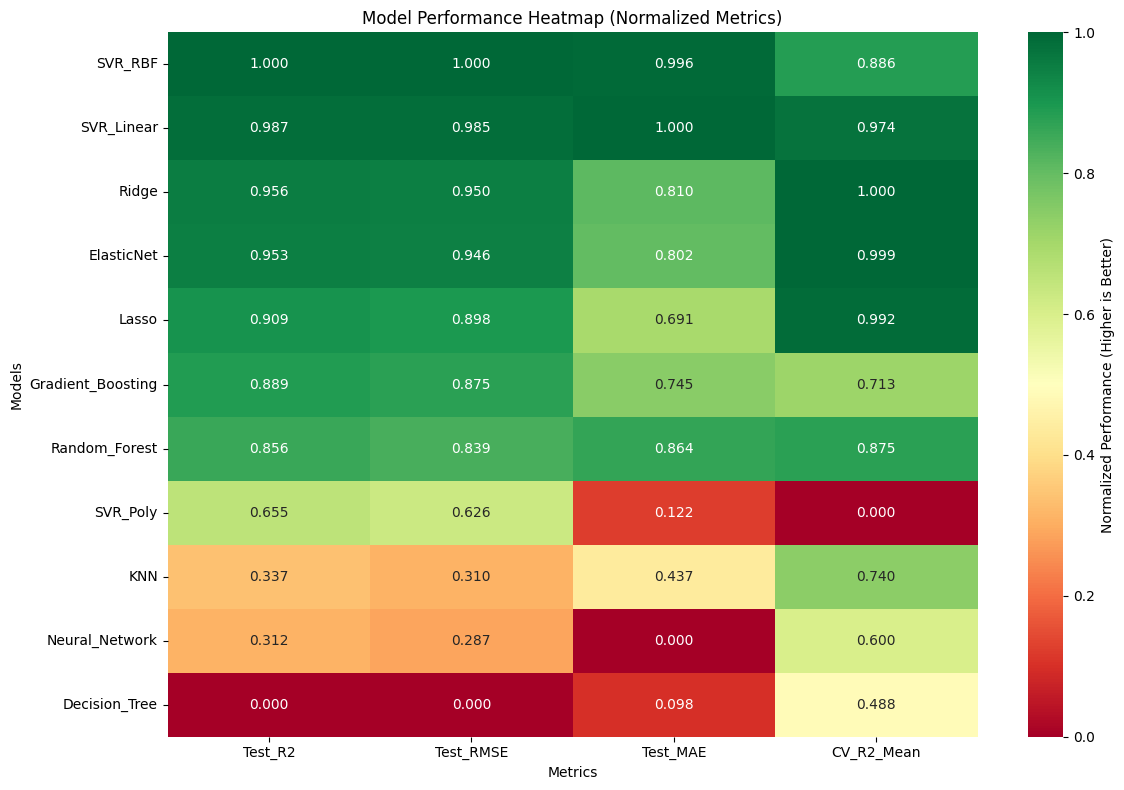


🎉 Model comparison complete!


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Assuming your data is already prepared as X_train_imputed, X_test_imputed, y_train, y_test
# If not, uncomment and modify the data loading section below:

"""
# Data loading and preprocessing (uncomment if needed)
train_df = pd.read_csv('FilesForModel/train_dataset_first.tsv', sep='\t')
eval_df = pd.read_csv('FilesForModel/eval_dataset_first.tsv', sep='\t')

import ast
train_df['combined_vector'] = train_df['combined_vector'].apply(ast.literal_eval)
eval_df['combined_vector'] = eval_df['combined_vector'].apply(ast.literal_eval)

train_df = train_df[train_df['combined_vector'].apply(len) == 10]
eval_df = eval_df[eval_df['combined_vector'].apply(len) == 10]

X_train = np.vstack(train_df['combined_vector'].values)
X_test = np.vstack(eval_df['combined_vector'].values)
y_train = train_df['PHQ_Score_x'].values
y_test = eval_df['PHQ_Score_x'].values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
"""

# Standardize features for algorithms that benefit from it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define models and their parameter grids
models_and_params = {
    'SVR_RBF': {
        'model': SVR(kernel='rbf'),
        'params': {
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.01, 0.1, 0.2, 0.5],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
        },
        'use_scaled': True
    },
    'SVR_Linear': {
        'model': SVR(kernel='linear'),
        'params': {
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.01, 0.1, 0.2, 0.5]
        },
        'use_scaled': False
    },
    'SVR_Poly': {
        'model': SVR(kernel='poly'),
        'params': {
            'C': [0.1, 1, 10, 100],
            'epsilon': [0.1, 0.2, 0.5],
            'degree': [2, 3, 4],
            'gamma': ['scale', 'auto']
        },
        'use_scaled': True
    },
    'Random_Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        'use_scaled': False
    },
    'Gradient_Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        },
        'use_scaled': False
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1, 10, 100, 1000]
        },
        'use_scaled': True
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100]
        },
        'use_scaled': True
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10],
            'l1_ratio': [0.1, 0.5, 0.7, 0.9]
        },
        'use_scaled': True
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 10, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        },
        'use_scaled': True
    },
    'Decision_Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2', None]
        },
        'use_scaled': False
    },
    'Neural_Network': {
        'model': MLPRegressor(max_iter=1000, random_state=42),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate_init': [0.001, 0.01, 0.1]
        },
        'use_scaled': True
    }
}

# Store results
results = []
best_models = {}

print("Training and evaluating models...")
print("=" * 60)

# Train and evaluate each model
for model_name, config in models_and_params.items():
    print(f"\nTraining {model_name}...")
    
    # Choose appropriate data (scaled or not)
    if config['use_scaled']:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train_imputed
        X_test_use = X_test_imputed
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        config['model'], 
        config['params'], 
        cv=5, 
        scoring='neg_mean_squared_error', 
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train_use, y_train)
    
    # Get best model and make predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_use)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(best_model, X_train_use, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': model_name,
        'Best_Params': grid_search.best_params_,
        'CV_R2_Mean': cv_mean,
        'CV_R2_Std': cv_std,
        'Test_R2': r2,
        'Test_MSE': mse,
        'Test_RMSE': rmse,
        'Test_MAE': mae,
        'Predictions': y_pred
    })
    
    best_models[model_name] = best_model
    
    print(f"Best params: {grid_search.best_params_}")
    print(f"CV R² (mean ± std): {cv_mean:.3f} ± {cv_std:.3f}")
    print(f"Test R²: {r2:.3f}")
    print(f"Test RMSE: {rmse:.3f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test_R2', ascending=False)

print("\n" + "=" * 60)
print("FINAL RESULTS SUMMARY")
print("=" * 60)
print(results_df[['Model', 'CV_R2_Mean', 'Test_R2', 'Test_RMSE', 'Test_MAE']].to_string(index=False))

# Create comprehensive plots
fig = plt.figure(figsize=(20, 15))

# 1. Model Performance Comparison (R² scores)
plt.subplot(3, 3, 1)
models = results_df['Model']
test_r2 = results_df['Test_R2']
cv_r2 = results_df['CV_R2_Mean']

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, cv_r2, width, label='CV R²', alpha=0.8)
plt.bar(x + width/2, test_r2, width, label='Test R²', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison (R² Scores)')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. RMSE vs MAE Comparison
plt.subplot(3, 3, 2)
rmse_values = results_df['Test_RMSE']
mae_values = results_df['Test_MAE']

x = np.arange(len(models))
width = 0.35

bars1 = plt.bar(x - width/2, rmse_values, width, label='RMSE', alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width/2, mae_values, width, label='MAE', alpha=0.8, color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Error Value')
plt.title('RMSE vs MAE Comparison')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, rmse in zip(bars1, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{rmse:.2f}', ha='center', va='bottom', fontsize=7)
for bar, mae in zip(bars2, mae_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{mae:.2f}', ha='center', va='bottom', fontsize=7)

# 3. Predicted vs True scatter plots for top 3 models
top_3_models = results_df.head(3)

for i, (idx, row) in enumerate(top_3_models.iterrows()):
    plt.subplot(3, 3, 4 + i)
    y_pred = row['Predictions']
    
    plt.scatter(y_test, y_pred, alpha=0.6, s=30)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    
    plt.xlabel('True PHQ Score')
    plt.ylabel('Predicted PHQ Score')
    plt.title(f'{row["Model"]}\nR² = {row["Test_R2"]:.3f}')
    plt.grid(True, alpha=0.3)
    
    # Add perfect prediction line
    plt.plot([0, 25], [0, 25], 'k--', alpha=0.5, lw=1)

# 4. Residuals plot for best model
plt.subplot(3, 3, 7)
best_model_data = results_df.iloc[0]
y_pred_best = best_model_data['Predictions']
residuals = y_test - y_pred_best

plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted PHQ Score')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - {best_model_data["Model"]}')
plt.grid(True, alpha=0.3)

# 5. Cross-validation scores with error bars
plt.subplot(3, 3, 8)
cv_means = results_df['CV_R2_Mean']
cv_stds = results_df['CV_R2_Std']

plt.errorbar(range(len(models)), cv_means, yerr=cv_stds, 
             fmt='o', capsize=5, capthick=2, alpha=0.8)
plt.xlabel('Models')
plt.ylabel('CV R² Score')
plt.title('Cross-Validation Scores with Error Bars')
plt.xticks(range(len(models)), models, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# 6. MAE vs RMSE Scatter Plot
plt.subplot(3, 3, 9)
plt.scatter(results_df['Test_MAE'], results_df['Test_RMSE'], 
           s=100, alpha=0.7, c=results_df['Test_R2'], cmap='viridis')

# Add model labels
for i, model in enumerate(results_df['Model']):
    plt.annotate(model.replace('_', '\n'), 
                (results_df['Test_MAE'].iloc[i], results_df['Test_RMSE'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=8,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.xlabel('MAE')
plt.ylabel('RMSE')
plt.title('MAE vs RMSE (Color = R²)')
plt.grid(True, alpha=0.3)
cbar = plt.colorbar()
cbar.set_label('R² Score')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\n" + "=" * 60)
print("DETAILED ANALYSIS")
print("=" * 60)

best_model_name = results_df.iloc[0]['Model']
best_r2 = results_df.iloc[0]['Test_R2']
best_rmse = results_df.iloc[0]['Test_RMSE']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   - Test R²: {best_r2:.3f}")
print(f"   - Test RMSE: {best_rmse:.3f}")
print(f"   - Test MAE: {results_df.iloc[0]['Test_MAE']:.3f}")
print(f"   - Best Parameters: {results_df.iloc[0]['Best_Params']}")

print(f"\n📊 PERFORMANCE INSIGHTS:")
print(f"   - Range of R² scores: {results_df['Test_R2'].min():.3f} to {results_df['Test_R2'].max():.3f}")
print(f"   - Range of RMSE: {results_df['Test_RMSE'].min():.2f} to {results_df['Test_RMSE'].max():.2f}")
print(f"   - Range of MAE: {results_df['Test_MAE'].min():.2f} to {results_df['Test_MAE'].max():.2f}")

# Find best model for each metric
best_r2_model = results_df.loc[results_df['Test_R2'].idxmax()]
best_rmse_model = results_df.loc[results_df['Test_RMSE'].idxmin()]
best_mae_model = results_df.loc[results_df['Test_MAE'].idxmin()]

print(f"\n🎯 BEST BY SPECIFIC METRICS:")
print(f"   - Best R²: {best_r2_model['Model']} ({best_r2_model['Test_R2']:.3f})")
print(f"   - Best RMSE: {best_rmse_model['Model']} ({best_rmse_model['Test_RMSE']:.3f})")
print(f"   - Best MAE: {best_mae_model['Model']} ({best_mae_model['Test_MAE']:.3f})")

# Identify models with good generalization (small gap between CV and test R²)
results_df['Generalization_Gap'] = results_df['CV_R2_Mean'] - results_df['Test_R2']
best_generalization = results_df.loc[results_df['Generalization_Gap'].abs().idxmin()]

print(f"\n🎯 BEST GENERALIZATION: {best_generalization['Model']}")
print(f"   - Gap between CV and Test R²: {best_generalization['Generalization_Gap']:.3f}")

# Model recommendations
print(f"\n💡 RECOMMENDATIONS:")
if best_r2 > 0.6:
    print(f"   ✅ Excellent performance achieved with {best_model_name}")
elif best_r2 > 0.4:
    print(f"   ⚠️  Moderate performance with {best_model_name}. Consider feature engineering.")
else:
    print(f"   ❌ Poor performance across all models. Consider:")
    print(f"      - Feature engineering and selection")
    print(f"      - Data quality improvements")
    print(f"      - Alternative modeling approaches")

print(f"\n   📈 Top 3 models to consider:")
for i, (_, row) in enumerate(results_df.head(3).iterrows(), 1):
    print(f"      {i}. {row['Model']} (R² = {row['Test_R2']:.3f}, RMSE = {row['Test_RMSE']:.2f}, MAE = {row['Test_MAE']:.2f})")

# Save results
results_df.to_csv('model_comparison_results.csv', index=False)
print(f"\n💾 Results saved to 'model_comparison_results.csv'")

# Create additional MAE-focused visualization
plt.figure(figsize=(15, 10))

# 1. Comprehensive metrics comparison
plt.subplot(2, 3, 1)
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, results_df['Test_R2'], width, label='R² Score', alpha=0.8)
plt.bar(x, results_df['Test_RMSE']/results_df['Test_RMSE'].max(), width, label='RMSE (normalized)', alpha=0.8)
plt.bar(x + width, results_df['Test_MAE']/results_df['Test_MAE'].max(), width, label='MAE (normalized)', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score/Normalized Error')
plt.title('Comprehensive Metrics Comparison')
plt.xticks(x, models, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. MAE only comparison
plt.subplot(2, 3, 2)
colors = plt.cm.plasma(np.linspace(0, 1, len(models)))
bars = plt.bar(models, results_df['Test_MAE'], color=colors, alpha=0.8)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('MAE Comparison Across Models')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, mae in zip(bars, results_df['Test_MAE']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{mae:.2f}', ha='center', va='bottom', fontsize=8)

# 3. Error metrics correlation
plt.subplot(2, 3, 3)
plt.scatter(results_df['Test_MAE'], results_df['Test_RMSE'], 
           s=results_df['Test_R2']*200, alpha=0.7, 
           c=range(len(results_df)), cmap='tab10')

for i, model in enumerate(results_df['Model']):
    plt.annotate(model.replace('_', ' '), 
                (results_df['Test_MAE'].iloc[i], results_df['Test_RMSE'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.xlabel('MAE')
plt.ylabel('RMSE')
plt.title('MAE vs RMSE\n(Bubble size = R²)')
plt.grid(True, alpha=0.3)

# 4. Top models detailed comparison
plt.subplot(2, 3, 4)
top_5_models = results_df.head(5)
metrics = ['Test_R2', 'Test_RMSE', 'Test_MAE']
metric_labels = ['R² Score', 'RMSE', 'MAE']

# Normalize metrics for radar-like comparison
normalized_data = top_5_models[['Model'] + metrics].copy()
for metric in metrics:
    if metric == 'Test_R2':
        # For R², higher is better, so keep as is
        normalized_data[metric] = (normalized_data[metric] - normalized_data[metric].min()) / (normalized_data[metric].max() - normalized_data[metric].min())
    else:
        # For errors, lower is better, so invert
        normalized_data[metric] = 1 - (normalized_data[metric] - normalized_data[metric].min()) / (normalized_data[metric].max() - normalized_data[metric].min())

x = np.arange(len(metric_labels))
width = 0.15

for i, (_, row) in enumerate(normalized_data.iterrows()):
    plt.bar(x + i*width, [row['Test_R2'], row['Test_RMSE'], row['Test_MAE']], 
           width, label=row['Model'], alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Normalized Performance (Higher = Better)')
plt.title('Top 5 Models - Normalized Performance')
plt.xticks(x + width*2, metric_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 5. MAE interpretation guide
plt.subplot(2, 3, 5)
mae_values = results_df['Test_MAE'].values
mae_categories = []
mae_colors = []

for mae in mae_values:
    if mae < 2:
        mae_categories.append('Excellent\n(< 2)')
        mae_colors.append('green')
    elif mae < 3:
        mae_categories.append('Good\n(2-3)')
        mae_colors.append('lightgreen')
    elif mae < 4:
        mae_categories.append('Fair\n(3-4)')
        mae_colors.append('orange')
    else:
        mae_categories.append('Poor\n(> 4)')
        mae_colors.append('red')

# Count models in each category
from collections import Counter
category_counts = Counter(mae_categories)

plt.pie(category_counts.values(), labels=category_counts.keys(), 
        colors=['green', 'lightgreen', 'orange', 'red'][:len(category_counts)],
        autopct='%1.0f%%', startangle=90)
plt.title('MAE Performance Distribution\n(PHQ Score Units)')

# 6. Error distribution analysis
plt.subplot(2, 3, 6)
best_model_data = results_df.iloc[0]
y_pred_best = best_model_data['Predictions']
errors = np.abs(y_test - y_pred_best)

plt.hist(errors, bins=15, alpha=0.7, edgecolor='black')
plt.axvline(np.mean(errors), color='red', linestyle='--', 
           label=f'Mean Error = {np.mean(errors):.2f}')
plt.axvline(np.median(errors), color='orange', linestyle='--', 
           label=f'Median Error = {np.median(errors):.2f}')

plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title(f'Error Distribution - {best_model_data["Model"]}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📏 MAE INTERPRETATION GUIDE:")
print(f"   - MAE represents the average absolute difference between predicted and true PHQ scores")
print(f"   - For PHQ scores (0-27 scale):")
print(f"     • MAE < 2.0: Excellent accuracy (within ~1-2 points on average)")
print(f"     • MAE 2.0-3.0: Good accuracy (within ~2-3 points on average)")
print(f"     • MAE 3.0-4.0: Fair accuracy (within ~3-4 points on average)")
print(f"     • MAE > 4.0: Poor accuracy (off by more than 4 points on average)")

best_mae = results_df['Test_MAE'].min()
print(f"\n   🎯 Your best MAE of {best_mae:.2f} means predictions are typically within {best_mae:.1f} PHQ points of the true score")


plt.figure(figsize=(12, 8))
metrics_for_heatmap = results_df[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'CV_R2_Mean']].set_index('Model')

# Normalize metrics for better visualization (higher is better for R², lower is better for errors)
normalized_metrics = metrics_for_heatmap.copy()
normalized_metrics['Test_R2'] = (normalized_metrics['Test_R2'] - normalized_metrics['Test_R2'].min()) / (normalized_metrics['Test_R2'].max() - normalized_metrics['Test_R2'].min())
normalized_metrics['CV_R2_Mean'] = (normalized_metrics['CV_R2_Mean'] - normalized_metrics['CV_R2_Mean'].min()) / (normalized_metrics['CV_R2_Mean'].max() - normalized_metrics['CV_R2_Mean'].min())
normalized_metrics['Test_RMSE'] = 1 - (normalized_metrics['Test_RMSE'] - normalized_metrics['Test_RMSE'].min()) / (normalized_metrics['Test_RMSE'].max() - normalized_metrics['Test_RMSE'].min())
normalized_metrics['Test_MAE'] = 1 - (normalized_metrics['Test_MAE'] - normalized_metrics['Test_MAE'].min()) / (normalized_metrics['Test_MAE'].max() - normalized_metrics['Test_MAE'].min())

sns.heatmap(normalized_metrics, annot=True, cmap='RdYlGn', center=0.5, 
            fmt='.3f', cbar_kws={'label': 'Normalized Performance (Higher is Better)'})
plt.title('Model Performance Heatmap (Normalized Metrics)')
plt.ylabel('Models')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()

print("\n🎉 Model comparison complete!")